# Support Vector Machine

## What is SVM ?
#### - A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection.
#### - A Classifier derived from statistical learning theory by Vapnik, al at. in 1972.
#### - Currently, SVM is widely used in object detection & recognization, content-based image retrieval, text recognition, biometrics, speech recognition,...
#### - It is one of the most popular models in Machine Learning, and any‐one interested in Machine Learning should have it in their toolbox. SVMs are partic‐ ularly well suited for classification of comp
##### Link: https://www.youtube.com/watch?v=HOzFVl5MitA&t=958s(giải thích thuật toán bằng tiếng việt)
##### Slide: https://autonlab.org/assets/tutorials/svm15.pdf

# Code

## Import library

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,balanced_accuracy_score,accuracy_score

In [5]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

## Get Data

In [6]:
def load_wine_data(path_to_dir, filename, csv_separator):
    csv_path = os.path.join(path_to_dir, filename)
    return pd.read_csv(csv_path, sep=csv_separator)
#os.path.dirname(path) return the parent directory of the given path
PARENT_DIR = os.path.dirname(os.getcwd())
WINE_DIR = os.path.join(PARENT_DIR, "Data set")
print(PARENT_DIR)
print(WINE_DIR) 

D:\studygit1\WineQuality
D:\studygit1\WineQuality\Data set


In [7]:
df_red_wine = load_wine_data(WINE_DIR, "winequality-red.csv", ";")

In [8]:
df_red_wine['good_quality'] = [1 if x > 5 else 0 for x in df_red_wine['quality']]#phân loại quality đưa về 0 và 1
X = df_red_wine.drop(['quality','good_quality'],axis = 1)# xóa 2 thuộc tính của tập
y = df_red_wine['good_quality']

## Check variable

In [9]:
X.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


## Train support vector classifier

In [10]:
# phân chia tập train
# data normal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = SVC()

In [12]:
model.fit(X_train,y_train)

SVC()

In [13]:
model.get_params()# các thông số của model

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Predict and Evaluation

In [14]:
predictions = model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(confusion_matrix(y_test,predictions))
print('/n')
print(classification_report(y_test,predictions))

[[ 48  93]
 [ 23 156]]
/n
              precision    recall  f1-score   support

           0       0.68      0.34      0.45       141
           1       0.63      0.87      0.73       179

    accuracy                           0.64       320
   macro avg       0.65      0.61      0.59       320
weighted avg       0.65      0.64      0.61       320



# With Scaling data

<class 'sklearn.preprocessing._data.MinMaxScaler'>
[[102  39]
 [ 41 138]]


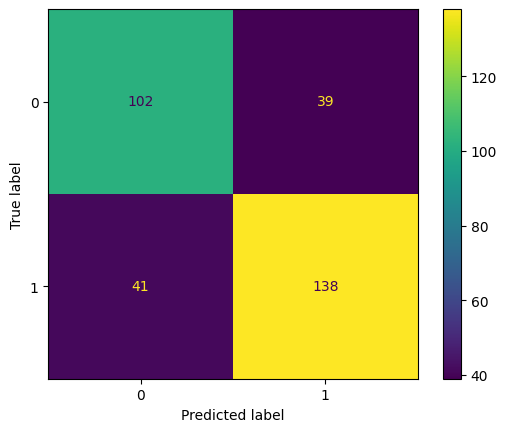

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       141
           1       0.78      0.77      0.78       179

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

Balanced accuracy:  0.7471769879947701
Accuracy:  0.75
<class 'sklearn.preprocessing._data.StandardScaler'>
[[109  32]
 [ 43 136]]


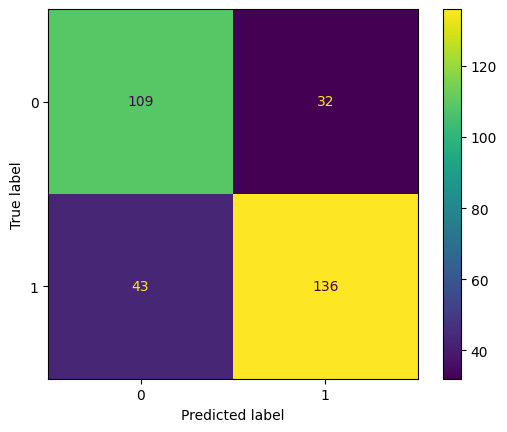

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       141
           1       0.81      0.76      0.78       179

    accuracy                           0.77       320
   macro avg       0.76      0.77      0.76       320
weighted avg       0.77      0.77      0.77       320

Balanced accuracy:  0.76641309085146
Accuracy:  0.765625
<class 'sklearn.preprocessing._data.MaxAbsScaler'>
[[ 89  52]
 [ 33 146]]


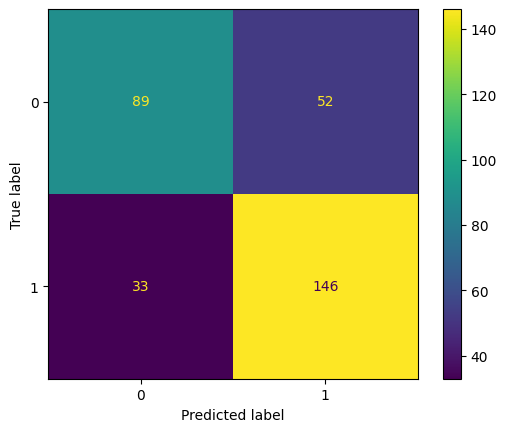

              precision    recall  f1-score   support

           0       0.73      0.63      0.68       141
           1       0.74      0.82      0.77       179

    accuracy                           0.73       320
   macro avg       0.73      0.72      0.73       320
weighted avg       0.73      0.73      0.73       320

Balanced accuracy:  0.723424065929712
Accuracy:  0.734375
<class 'sklearn.preprocessing._data.RobustScaler'>
[[105  36]
 [ 43 136]]


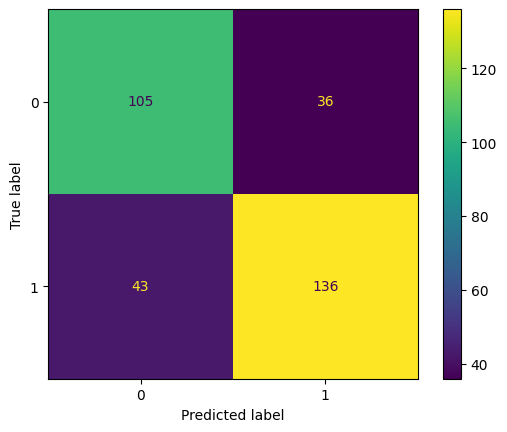

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       141
           1       0.79      0.76      0.77       179

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

Balanced accuracy:  0.7522286936883394
Accuracy:  0.753125
<class 'sklearn.preprocessing._data.Normalizer'>
[[ 61  80]
 [ 40 139]]


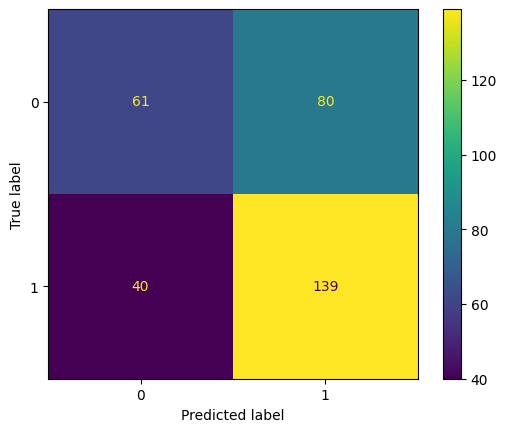

              precision    recall  f1-score   support

           0       0.60      0.43      0.50       141
           1       0.63      0.78      0.70       179

    accuracy                           0.62       320
   macro avg       0.62      0.60      0.60       320
weighted avg       0.62      0.62      0.61       320

Balanced accuracy:  0.6045802131621697
Accuracy:  0.625


In [17]:
df_train_sc = [0,0,0,0,0]
df_test_sc = [0,0,0,0,0]
def scaling(df_train,df_test, sc):
    trans = sc().fit(df_train)
    df_train = trans.fit_transform(df_train)
    trans = sc().fit(df_test)
    df_test = trans.fit_transform(df_test)
    return df_train, df_test
scaler_name = [MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, Normalizer]

for i in range(len(scaler_name)):    
    df_train_sc[i],df_test_sc[i] = scaling(X_train,X_test,scaler_name[i])
    model = SVC()
    model.fit(df_train_sc[i],y_train)
    prediction = model.predict(df_test_sc[i])
     
    print(scaler_name[i])
    print(confusion_matrix(y_test,prediction))
    ConfusionMatrixDisplay.from_predictions(y_test,prediction)
    plt.show()
    print(classification_report(y_test,prediction))
    print('Balanced accuracy: ', balanced_accuracy_score(y_test,prediction))
    print('Accuracy: ', accuracy_score(y_test,prediction))
    
    

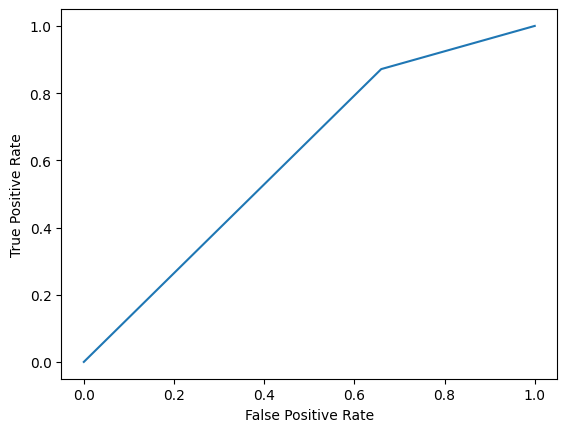

In [19]:
#ROC with normalize data
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, predictions, pos_label=model.classes_[1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
Accuracy = accuracy_score(y_test,predictions)
Precision = metrics.precision_score(y_test, predictions)
F1_score = metrics.f1_score(y_test, predictions)
d1 = {"Model": "No scaler", "Accuracy": Accuracy, "Precision": Precision , "F1_score": F1_score}
df1 = pd.DataFrame(d1, index ={1})


# Gridsearch

### GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. 

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel': ['rbf']}

### One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier. You should add refit=True and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

In [22]:
grid = GridSearchCV(SVC(),param_grid, verbose=3)

In [23]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.531 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.527 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.527 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.527 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.539 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.547 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.539 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.539 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.533 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.633 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.629 total time=   0.2s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.684 total time=   0.2s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.688 total time=   0.2s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.671 total time=   0.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.695 total time=   0.2s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.723 total time=   0.1s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.715 total time=   0.2s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.727 total time=   0.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.698 total time=   0.2s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.699 total time=   0.7s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.719 total time=   0.7s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.664 total time=   0.6s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [25]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [26]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [27]:
grid_predictions = grid.predict(X_test)

In [28]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[107  34]
 [ 43 136]]


              precision    recall  f1-score   support

           0       0.71      0.76      0.74       141
           1       0.80      0.76      0.78       179

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320

